In [1]:
import pendulum

variable = 'water_surface_height_above_reference_datum'
yesterday = pendulum.yesterday()
today = pendulum.today()

buoy = '8454000'

url = (
    'https://opendap.co-ops.nos.noaa.gov/ioos-dif-sos/SOS?'
    'service=SOS'
    '&request=GetObservation'
    '&version=1.0.0'
    f'&observedProperty={variable}'
    f'&offering=urn:ioos:station:NOAA.NOS.CO-OPS:{buoy}'
    '&responseFormat=text/csv'
    f'&eventTime={yesterday:%Y-%m-%dT%H:%M:%SZ}/'
    f'{today:%Y-%m-%dT%H:%M:%SZ}'
    '&result=VerticalDatum==urn:ogc:def:datum:epsg::5103'
    '&dataType=PreliminarySixMinute'
)

print(url)

https://opendap.co-ops.nos.noaa.gov/ioos-dif-sos/SOS?service=SOS&request=GetObservation&version=1.0.0&observedProperty=water_surface_height_above_reference_datum&offering=urn:ioos:station:NOAA.NOS.CO-OPS:8454000&responseFormat=text/csv&eventTime=2018-07-09T00:00:00Z/2018-07-10T00:00:00Z&result=VerticalDatum==urn:ogc:def:datum:epsg::5103&dataType=PreliminarySixMinute


In [2]:
import pandas as pd


df = pd.read_csv(url, index_col='date_time')

df.head()

,station_id,sensor_id,latitude (degree),longitude (degree),water_surface_height_above_reference_datum (m),datum_id,vertical_position (m),sigma,quality_flags
date_time,,,,,,,,,
2018-07-09T00:00:00Z,urn:ioos:station:NOAA.NOS.CO-OPS:8454000,urn:ioos:sensor:NOAA.NOS.CO-OPS:8454000:A1,41.8067,-71.4006,-0.177,urn:ogc:def:datum:epsg::5103,1.818,0.010,1;0;0;0
2018-07-09T00:06:00Z,urn:ioos:station:NOAA.NOS.CO-OPS:8454000,urn:ioos:sensor:NOAA.NOS.CO-OPS:8454000:A1,41.8067,-71.4006,-0.208,urn:ogc:def:datum:epsg::5103,1.818,0.006,0;0;0;0
2018-07-09T00:12:00Z,urn:ioos:station:NOAA.NOS.CO-OPS:8454000,urn:ioos:sensor:NOAA.NOS.CO-OPS:8454000:A1,41.8067,-71.4006,-0.237,urn:ogc:def:datum:epsg::5103,1.818,0.005,0;0;0;0
2018-07-09T00:18:00Z,urn:ioos:station:NOAA.NOS.CO-OPS:8454000,urn:ioos:sensor:NOAA.NOS.CO-OPS:8454000:A1,41.8067,-71.4006,-0.267,urn:ogc:def:datum:epsg::5103,1.818,0.005,0;0;0;0
2018-07-09T00:24:00Z,urn:ioos:station:NOAA.NOS.CO-OPS:8454000,urn:ioos:sensor:NOAA.NOS.CO-OPS:8454000:A1,41.8067,-71.4006,-0.296,urn:ogc:def:datum:epsg::5103,1.818,0.004,0;0;0;0


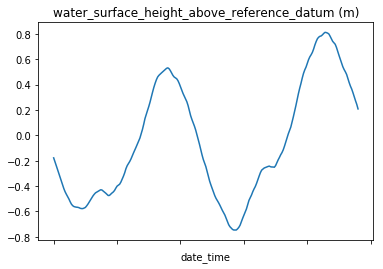

In [3]:
%matplotlib inline

col = df.columns[df.columns.str.startswith(variable)]
ax = df[col].plot.line(legend=False)
ax.set_title(col.values[0]);